In [347]:
#import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [348]:
#import data
path = 'F:/Dropbox/Columbia MSBA/IEOR E4501 Tools for Analytics/Project/airbnb-price-prediction/data.csv'
data = pd.read_csv(path)

G:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,25,26,27,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,55,56,57,60,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [349]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,20605308,6.684612,House,Entire home/apt,16,5.0,Real Bed,strict,True,NYC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2186452,6.388561,House,Entire home/apt,16,7.0,Real Bed,strict,False,LA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17764355,5.700444,House,Entire home/apt,16,5.0,Real Bed,strict,True,Chicago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1446537,7.170120,House,Entire home/apt,16,7.0,Real Bed,flexible,False,LA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13399619,6.257668,House,Entire home/apt,16,4.0,Real Bed,flexible,False,NYC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
len(data)


65282

In [351]:
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed

In [352]:
del_cols=['Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67']
data.drop(del_cols,axis=1,inplace=True)
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [353]:
# check the dtypes of different types of variable.
pd.options.display.max_rows = 65
dtypes = data.dtypes.reset_index()
dtypes.columns = ["Count", "Column Type"]
dtypes

,Count,Column Type
0,id,int64
1,log_price,float64
2,property_type,object
3,room_type,object
4,accommodates,int64
5,bathrooms,float64
6,bed_type,object
7,cancellation_policy,object
8,cleaning_fee,bool
9,city,object


In [354]:
dtypes.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,3
1,int64,2
2,float64,7
3,object,13


In [355]:
# divide the variables into numerical variables and categorical variables
num_var=['accommodates','bathrooms','cancellation_fee','first_view','host_response_rate','host_since','latitude','longitude','number_of_reviews','review_scores_rating',
        'zipcode','bedrooms','beds']
cate_var=['property_type','room_type','bed_type','cancellation_policy','city','host_has_profile_pic','host_identity_verified','instant_bookable','neighbourhood']

In [356]:
# describe log_price# descr 
data['log_price'].describe()

count    65282.000000
mean         4.785188
std          0.714140
min          0.000000
25%          4.317488
50%          4.718499
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

In [357]:
#calculete Target variable
data['Saleprice']=np.exp(data['log_price'])

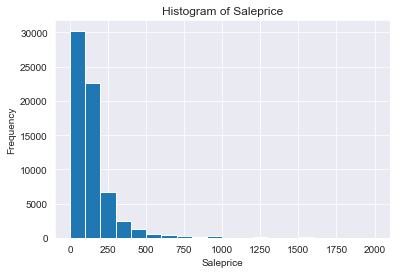

In [358]:
def drawHist(heights):
    plt.hist(heights, 20)
    plt.xlabel('Saleprice')
    plt.ylabel('Frequency')
    plt.title('Histogram of Saleprice')
    plt.show()
drawHist(data['Saleprice'])

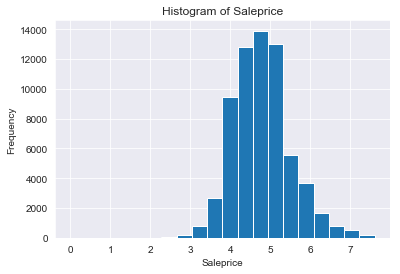

In [359]:
drawHist(data['log_price'])

In [360]:
data.drop('host_response_rate', axis=1, inplace=True)

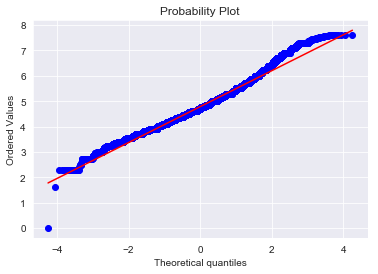

In [361]:

# plot probability distribution# plot  
fig = plt.figure()
res = stats.probplot(data['log_price'], plot=plt)
plt.show()

In [362]:
# deal with dates
import time
import datetime
def dif_time(date):
    now_time = datetime.datetime.now()
    now_time = now_time.strftime('%Y/%m/%d')
    d2 = datetime.datetime.strptime(now_time, '%Y/%m/%d')
    if str(date) !='nan':
        d1 = datetime.datetime.strptime(str(date),'%Y/%m/%d')
        day = (d2 - d1).days
        return day
    else:
        return None

In [363]:
#transform date to days
dates_to_transform=['first_review','host_since','last_review']
for col in dates_to_transform:
    data[col]=data[col].apply(dif_time)

In [364]:
for u in data.columns:
    if data[u].dtype==bool:
        data[u]=data[u].astype('int')

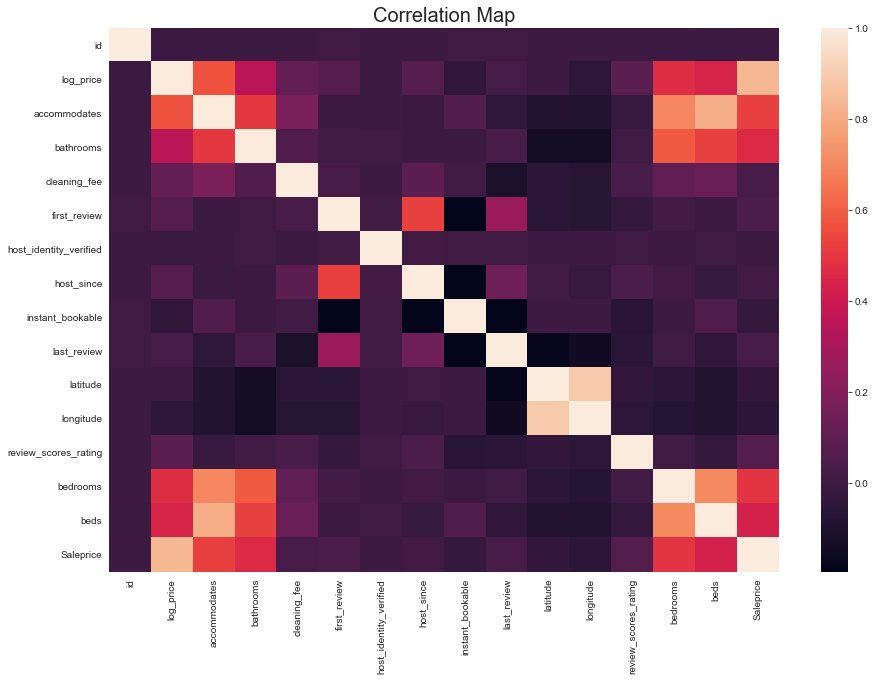

In [365]:
#plot correlation matrix
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

def correlation_map(df):
    correlation = data.corr()
    plt.subplots(figsize=(15,10))
    plt.title('Correlation Map', fontsize=20)
    sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
    
correlation_map(data)

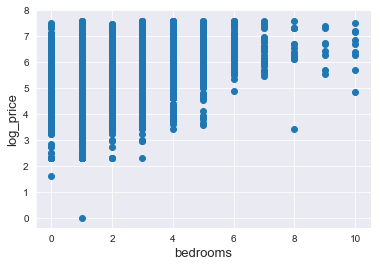

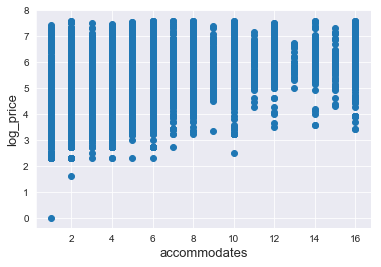

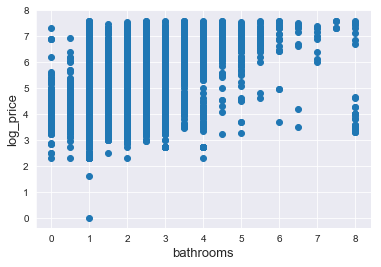

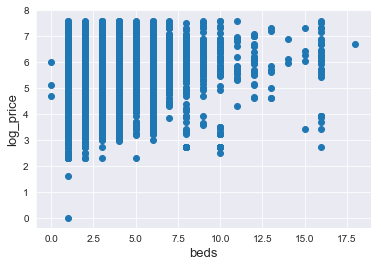

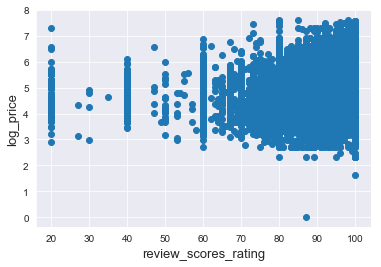

G:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x864 with 0 Axes>

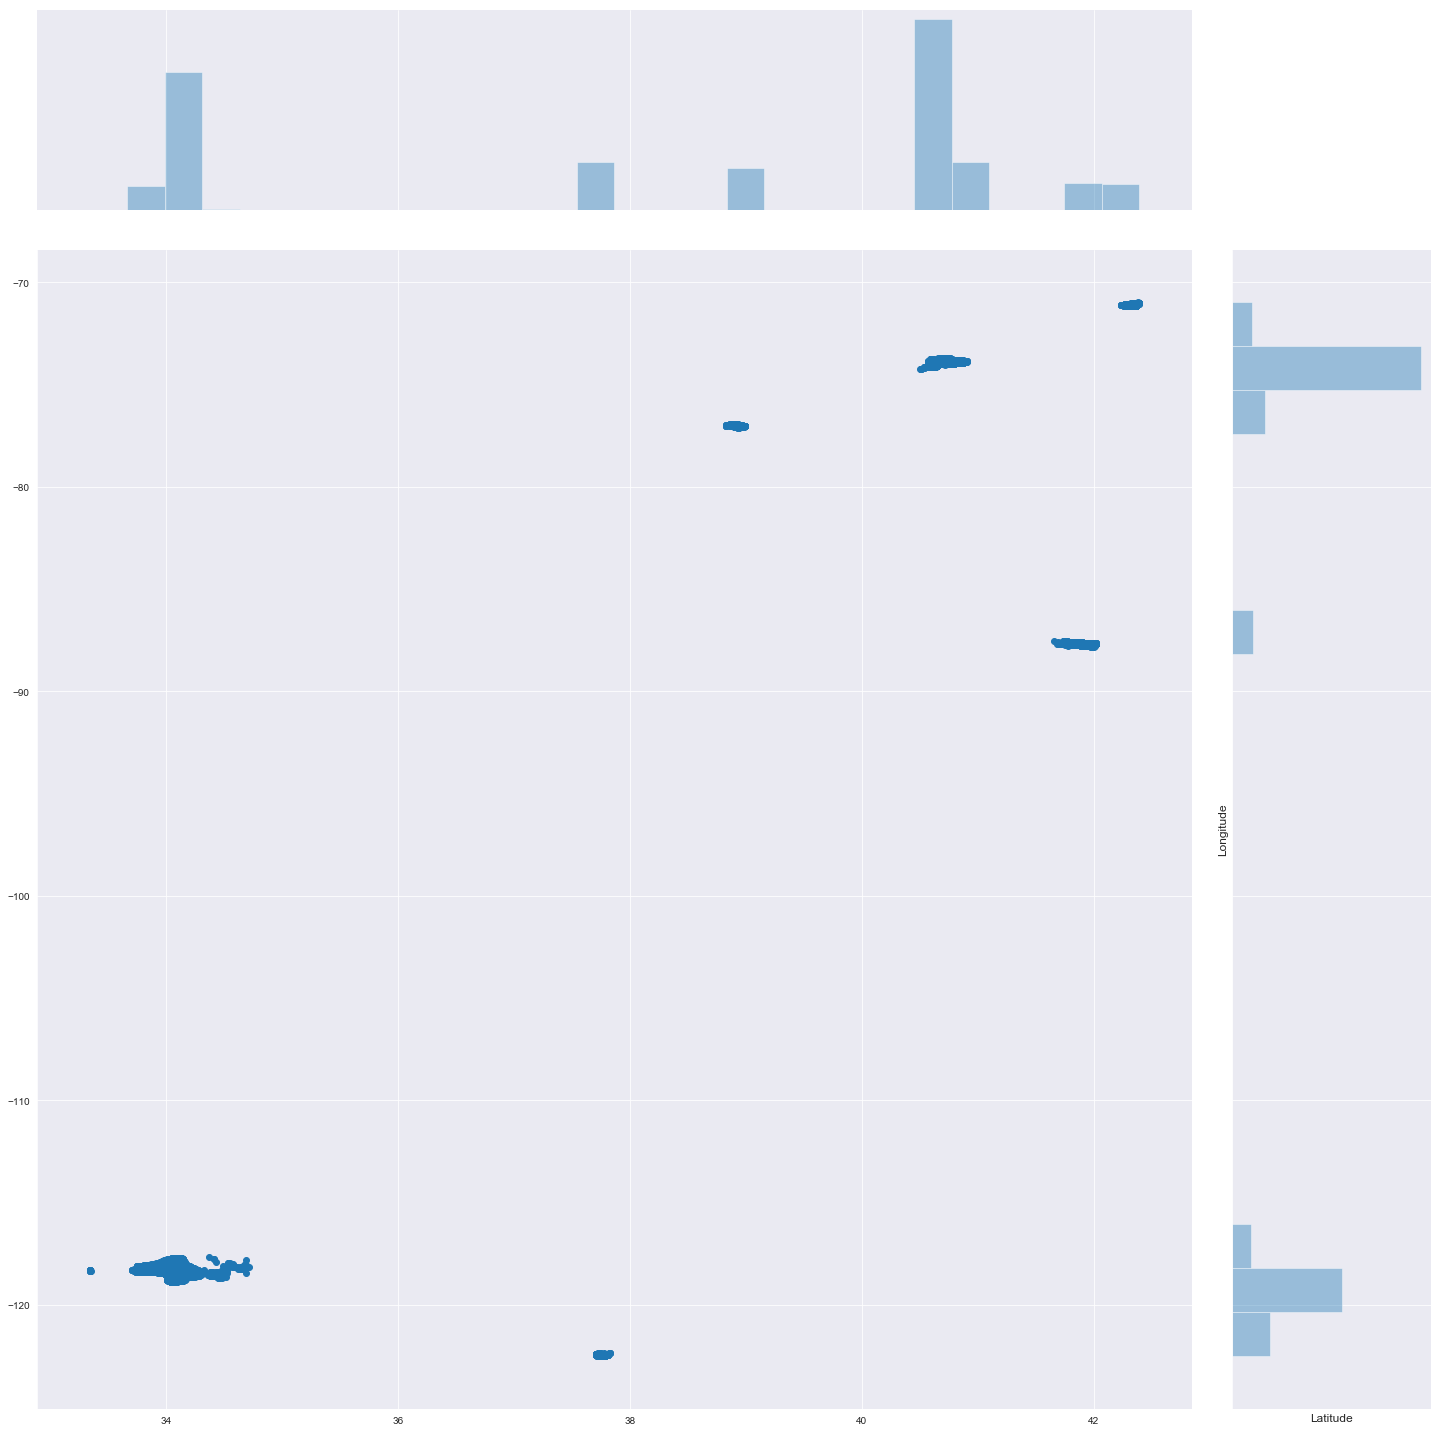

In [366]:
# scatter plot 
# log_price vs bedrooms
fig, ax = plt.subplots()
ax.scatter(data['bedrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bedrooms', fontsize=13)
plt.show()

# log_price vs accomodates
fig, ax = plt.subplots()
ax.scatter(data['accommodates'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('accommodates', fontsize=13)
plt.show()

# log_price vs bathrooms
fig, ax = plt.subplots()
ax.scatter(data['bathrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bathrooms', fontsize=13)
plt.show()

# log_price vs beds
fig, ax = plt.subplots()
ax.scatter(data['beds'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('beds', fontsize=13)
plt.show()

# log_price vs review_scores_rating
fig, ax = plt.subplots()
ax.scatter(data['review_scores_rating'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('review_scores_rating', fontsize=13)
plt.show()

# explore the latitude and longitude variable
plt.figure(figsize=(12,12))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=20)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

(-0.5, 4.5, 0, 10)

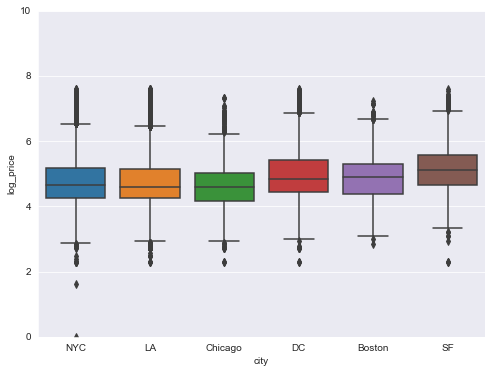

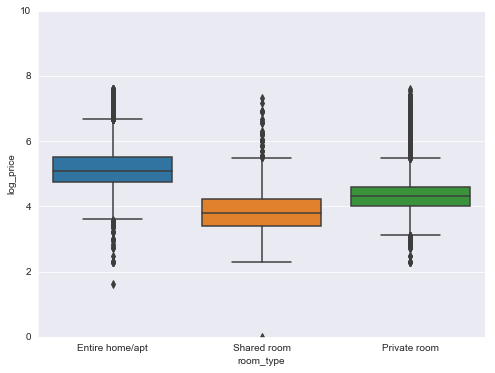

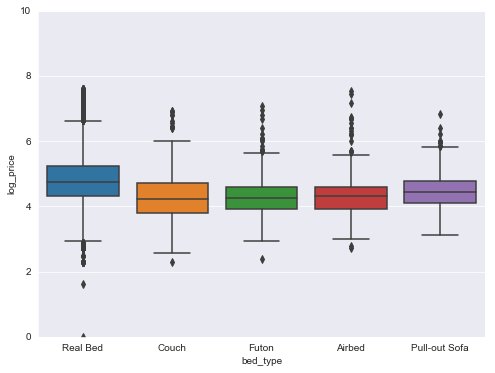

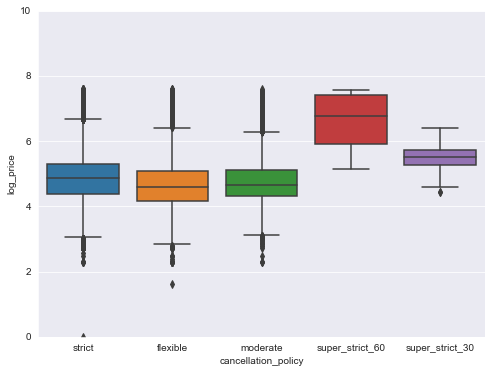

In [367]:
# box plot
# log_price vs city
var = 'city'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs room_type
var = 'room_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# # log_price vs property_type
# var = 'property_type'
# price_data = pd.concat([data['log_price'], data[var]], axis=1)
# f,ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="log_price", data=price_data)
# fig.axis(ymin=0, ymax=10)

# log_price vs bed_type
var = 'bed_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs cancellation_policy
var = 'cancellation_policy'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

In [368]:
#calculate missing data
total_missing = data.isnull().sum()
missing_ratio = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total_missing, missing_ratio], axis=1, keys=['total_missing', 'missing_ratio'])
missing_data = missing_data.ix[missing_data['missing_ratio']>0]
missing_data = missing_data.sort_values(by='missing_ratio',ascending=False)
missing_data.head(20)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,total_missing,missing_ratio
review_scores_rating,13439,0.205861
first_review,12724,0.194908
last_review,12694,0.194449
neighbourhood,5178,0.079317
zipcode,759,0.011626
bathrooms,155,0.002374
host_has_profile_pic,146,0.002236
host_since,146,0.002236
beds,123,0.001884
bedrooms,66,0.001011


Text(0.5,1,'Ratio of missing data by properties')

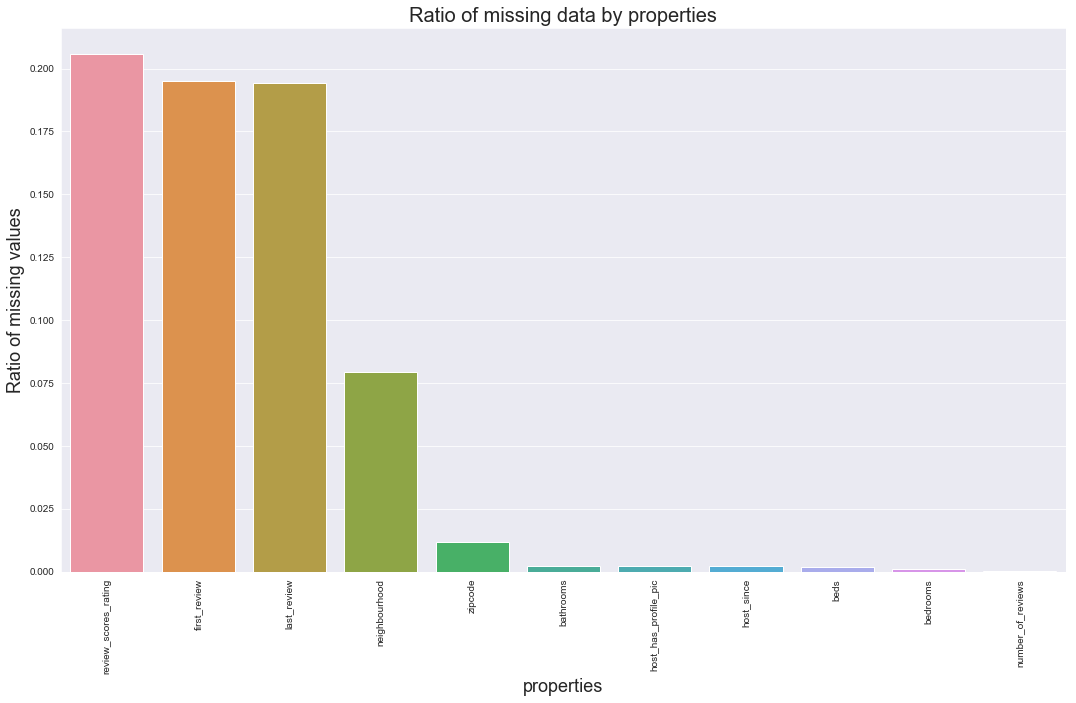

In [369]:
#plot ratio of missing
f, ax = plt.subplots(figsize=(18, 10))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data.missing_ratio)
plt.xlabel('properties', fontsize=18)
plt.ylabel('Ratio of missing values', fontsize=18)
plt.title('Ratio of missing data by properties', fontsize=20)

In [370]:
# to many missing_values
#delete column host_response_rate
data.drop('host_response_rate', axis=1, inplace=True)

KeyError: "['host_response_rate'] not found in axis"

In [314]:
# delete NA row
col_to_del=['neighbourhood','zipcode']
for col in col_to_del:
    data[col] = data[col].fillna('None')

In [315]:
data = data[(data.neighbourhood != 'None') & (data.zipcode != 'None')]

In [316]:
# fill NA by none
fillbynone=['first_review','host_since','last_review','host_has_profile_pic','number_of_reviews']
for col in fillbynone:
    data[col] = data[col].fillna('None')

In [318]:
#fill NA by numerical value
fillbymedian=['review_scores_rating']
for col in fillbymedian:
    data[col] = data[col].fillna(data[col].transform(lambda x: x.fillna(x.median())))

In [319]:
fillbymode=['bathrooms','beds','bedrooms']
for col in fillbymode:
    data[col] = data[col].fillna(data[col].mode()[0])

In [320]:
#check if there is any missing_value left
def left_missing(dataset):
    val = dataset.isnull().sum().max()
    if val>0:
        raise ValueError('There is still missing_value left!')
left_missing(data)

In [321]:
# transform some variables to str
data['bedrooms'] = data['bedrooms'].apply(str)
data['bathrooms'] = data['bathrooms'].apply(str)
data['accommodates']=data['accommodates'].apply(str)
data['beds']=data['beds'].apply(str)

In [323]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Saleprice
0,20605308,6.684612,House,Entire home/apt,16,10,Real Bed,strict,1,NYC,...,433,40.684922,-73.954891,Bedford-Stuyvesant,70,95.0,11216,9,9,800.000000
1,2186452,6.388561,House,Entire home/apt,16,14,Real Bed,strict,0,LA,...,581,33.975376,-118.295995,South LA,16,100.0,90044,2,8,595.000000
2,17764355,5.700444,House,Entire home/apt,16,10,Real Bed,strict,1,Chicago,...,623,41.947212,-87.655574,Wrigleyville,13,95.0,60613,2,8,299.000000
3,1446537,7.170120,House,Entire home/apt,16,14,Real Bed,flexible,0,LA,...,597,34.048690,-118.319579,Mid-Wilshire,0,89.0,90019,2,8,1299.999999
4,13399619,6.257668,House,Entire home/apt,16,8,Real Bed,flexible,0,NYC,...,None,40.674952,-73.819140,South Ozone Park,0,96.0,11420,2,8,522.000000


In [324]:
# skewness
numeric_feats =data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 12 skewed numerical features to Box Cox transform


In [326]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(data,test_size=0.2)

train_data.to_csv('train_data.csv',index=False)
test_data.to_csv('test_data.csv',index=False)

In [327]:
train_data.head()


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Saleprice
63467,7989669,5.164786,Condominium,Entire home/apt,2,2,Real Bed,strict,1,LA,...,624,34.005135,-118.490299,Santa Monica,6,90.0,90405,0,1,175.0
41758,9044516,4.442651,Apartment,Private room,2,2,Real Bed,strict,1,NYC,...,427,40.820208,-73.953071,Harlem,44,95.0,10031,1,1,85.0
43037,7275881,3.912023,Condominium,Private room,2,2,Real Bed,strict,1,NYC,...,439,40.577653,-73.983375,Coney Island,171,94.0,11224,1,1,50.0
18064,3851703,5.010635,House,Private room,2,2,Real Bed,flexible,0,Boston,...,554,42.290683,-71.061916,Dorchester,1,100.0,2122,1,10,150.0
22946,3272552,5.129899,Apartment,Entire home/apt,3,2,Real Bed,strict,1,LA,...,1679,34.103837,-118.342519,Hollywood,4,67.0,90028,1,10,169.0


In [328]:
test_data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,Saleprice
21947,17016281,5.003946,Apartment,Entire home/apt,3,2,Real Bed,strict,1,SF,...,470,37.740036,-122.420836,Bernal Heights,18,89.0,94110,1,10,149.0
18938,16205461,5.135798,Apartment,Entire home/apt,4,2,Real Bed,strict,1,SF,...,601,37.759047,-122.426525,Mission District,9,98.0,94110,1,10,170.0
3640,20616888,5.521461,House,Entire home/apt,12,2,Real Bed,flexible,1,LA,...,None,33.982380,-118.055445,Whittier,0,96.0,90606,4,12,250.0
57964,16366956,4.382027,Apartment,Entire home/apt,2,3,Real Bed,flexible,1,LA,...,None,34.083257,-118.285542,East Hollywood,0,96.0,90029,1,1,80.0
18608,8408530,5.843544,Apartment,Entire home/apt,3,2,Real Bed,strict,1,NYC,...,448,40.758559,-73.988968,Hell's Kitchen,82,98.0,10036,1,10,345.0


In [330]:
print (len(train_data))
print (len(test_data))

47717
11930


In [331]:
train_data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds', 'Saleprice'],
      dtype='object')

In [332]:
len(train_data.columns)

25

In [333]:
#if one column only has one value, consider to delete the column
train_columns_to_remove = [col for col in train_data.columns if train_data[col].nunique() == 1]
test_columns_to_remove = [col for col in test_data.columns if test_data[col].nunique() == 1]

In [334]:
print(train_columns_to_remove)
print(test_columns_to_remove)

[]
[]


In [335]:
X = data.drop("log_price",axis=1).values
y = data["log_price"].values

In [336]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [337]:
from sklearn.preprocessing import LabelEncoder

In [338]:
for col in data.columns:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train_data[col].values.astype('str')) + list(test_data[col].values.astype('str')))
    train_data[col] = lbl.transform(list(train_data[col].values.astype('str')))
    test_data[col] = lbl.transform(list(test_data[col].values.astype('str')))

id


G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


log_price
property_type
room_type
accommodates
bathrooms
bed_type
cancellation_policy
cleaning_fee
city
first_review
host_has_profile_pic
host_identity_verified
host_since
instant_bookable
last_review
latitude
longitude
neighbourhood
number_of_reviews
review_scores_rating
zipcode
bedrooms
beds
Saleprice


In [339]:
from sklearn.model_selection import TimeSeriesSplit

In [340]:
from sklearn.model_selection import KFold #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
import lightgbm as lgb

In [341]:
params = {"objective" : "regression", "metric" : "rmse", "max_depth": 8, "min_child_samples": 20, "reg_alpha": 0.2, "reg_lambda": 0.2,
        "num_leaves" : 257, "learning_rate" : 0.01, "subsample" : 0.9, "colsample_bytree" : 0.9, "subsample_freq ": 5}
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=False, random_state=42)
# Cleaning and defining parameters for LGBM
model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)

In [342]:
#train = train.sort_values('date')
X = train_data.drop('log_price', axis=1)
y = train_data['log_price']
X_test = test_data.drop('log_price', axis=1)
# I use TimeSeriesSplit as we have time series
tscv = TimeSeriesSplit(n_splits=10)

In [343]:

prediction = np.zeros(test_data.shape[0])

for fold_n, (train_index, test_index) in enumerate(folds.split(X)):
    print('Fold:', fold_n)
    #print(f'Train samples: {len(train_index)}. Valid samples: {len(test_index)}')
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    

    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
            verbose=500, early_stopping_rounds=10)
    
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    prediction += y_pred
prediction /= n_fold

Fold: 0
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 37.8928	valid_1's rmse: 43.5206
[1000]	training's rmse: 33.0451	valid_1's rmse: 40.5252
Early stopping, best iteration is:
[1137]	training's rmse: 32.2448	valid_1's rmse: 40.212
Fold: 1
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 37.7	valid_1's rmse: 45.8146
Early stopping, best iteration is:
[838]	training's rmse: 34.4012	valid_1's rmse: 44.316
Fold: 2
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 37.974	valid_1's rmse: 45.9444
[1000]	training's rmse: 33.1514	valid_1's rmse: 42.9374
[1500]	training's rmse: 29.5325	valid_1's rmse: 40.7923
[2000]	training's rmse: 27.1035	valid_1's rmse: 39.2973
Early stopping, best iteration is:
[2117]	training's rmse: 26.6267	valid_1's rmse: 39.0719
Fold: 3
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 38.087	valid_1's rmse: 41.8533
[1000]	trai

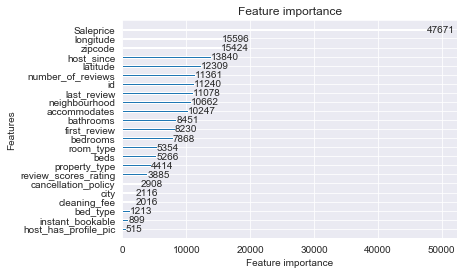

In [344]:
# Use lgb model to list the feature importance from the most important feature to the least important feature.

lgb.plot_importance(model, max_num_features=30);

In [101]:
from catboost import CatBoostRegressor

In [102]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [103]:
model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             #metric_period = 50,
                             od_wait=20)
model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              use_best_model=True,
              verbose=True)
    
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)



0:	learn: 173.5279373	test: 172.8503519	best: 172.8503519 (0)	total: 869ms	remaining: 14m 27s
1:	learn: 159.5209569	test: 158.9416485	best: 158.9416485 (1)	total: 1.85s	remaining: 15m 22s
2:	learn: 147.0596263	test: 146.5795099	best: 146.5795099 (2)	total: 2.83s	remaining: 15m 40s
3:	learn: 136.2838006	test: 135.9202150	best: 135.9202150 (3)	total: 3.84s	remaining: 15m 55s
4:	learn: 126.3724436	test: 126.1050784	best: 126.1050784 (4)	total: 4.83s	remaining: 16m 1s
5:	learn: 117.6252793	test: 117.4969513	best: 117.4969513 (5)	total: 5.83s	remaining: 16m 5s
6:	learn: 110.0486109	test: 110.0320698	best: 110.0320698 (6)	total: 6.9s	remaining: 16m 18s
7:	learn: 103.3662082	test: 103.3310757	best: 103.3310757 (7)	total: 7.92s	remaining: 16m 22s
8:	learn: 98.1558472	test: 98.1513253	best: 98.1513253 (8)	total: 8.01s	remaining: 14m 41s
9:	learn: 93.2100258	test: 93.2846471	best: 93.2846471 (9)	total: 9.11s	remaining: 15m 1s
10:	learn: 88.7598325	test: 88.9096864	best: 88.9096864 (10)	total: 10

89:	learn: 51.7175378	test: 53.2484749	best: 53.2484749 (89)	total: 1m 5s	remaining: 11m
90:	learn: 51.7174710	test: 53.2481541	best: 53.2481541 (90)	total: 1m 5s	remaining: 10m 52s
91:	learn: 51.6967669	test: 53.2360673	best: 53.2360673 (91)	total: 1m 5s	remaining: 10m 47s
92:	learn: 51.4252559	test: 53.0623148	best: 53.0623148 (92)	total: 1m 6s	remaining: 10m 48s
93:	learn: 51.2940203	test: 52.8970437	best: 52.8970437 (93)	total: 1m 7s	remaining: 10m 48s
94:	learn: 51.0632096	test: 52.7159329	best: 52.7159329 (94)	total: 1m 8s	remaining: 10m 48s
95:	learn: 50.9290735	test: 52.5753029	best: 52.5753029 (95)	total: 1m 8s	remaining: 10m 48s
96:	learn: 50.9181006	test: 52.5625449	best: 52.5625449 (96)	total: 1m 9s	remaining: 10m 48s
97:	learn: 50.7693338	test: 52.4731696	best: 52.4731696 (97)	total: 1m 10s	remaining: 10m 48s
98:	learn: 50.6512077	test: 52.3032897	best: 52.3032897 (98)	total: 1m 10s	remaining: 10m 45s
99:	learn: 50.5533407	test: 52.1592331	best: 52.1592331 (99)	total: 1m 1

178:	learn: 47.6100534	test: 49.6435135	best: 49.6435135 (178)	total: 1m 41s	remaining: 7m 45s
179:	learn: 47.6100533	test: 49.6435160	best: 49.6435135 (178)	total: 1m 41s	remaining: 7m 42s
180:	learn: 47.6097093	test: 49.6432613	best: 49.6432613 (180)	total: 1m 41s	remaining: 7m 39s
181:	learn: 47.6097092	test: 49.6432635	best: 49.6432613 (180)	total: 1m 41s	remaining: 7m 36s
182:	learn: 47.6097091	test: 49.6432654	best: 49.6432613 (180)	total: 1m 41s	remaining: 7m 33s
183:	learn: 47.6093447	test: 49.6431083	best: 49.6431083 (183)	total: 1m 41s	remaining: 7m 31s
184:	learn: 47.6093409	test: 49.6430964	best: 49.6430964 (184)	total: 1m 41s	remaining: 7m 29s
185:	learn: 47.6092959	test: 49.6426538	best: 49.6426538 (185)	total: 1m 42s	remaining: 7m 26s
186:	learn: 47.6092958	test: 49.6426551	best: 49.6426538 (185)	total: 1m 42s	remaining: 7m 23s
187:	learn: 47.6090160	test: 49.6424887	best: 49.6424887 (187)	total: 1m 42s	remaining: 7m 21s
188:	learn: 47.6090159	test: 49.6424899	best: 49.6